Regressão Linear multiplo - Prevendo consumo de cerveja

importando as bibliotecas


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Carregando os dados

In [ ]:
dados = pd.read_csv('Consumo_cerveja.csv', sep=';')

In [ ]:
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


Verificando o tamanho do dataset

In [ ]:
dados.shape

(365, 7)

Estatísticas descritivas

In [ ]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


Matriz de correlação

In [ ]:
dados1 = dados.drop('data', axis=1)


In [ ]:
dados1.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


*Tomar cuidado na escolha da variaveis porque, colocar variaveis que tem uma alta correlaçao pode ser mais do mesmo*

Comportamento da Variável Dependente(Y)

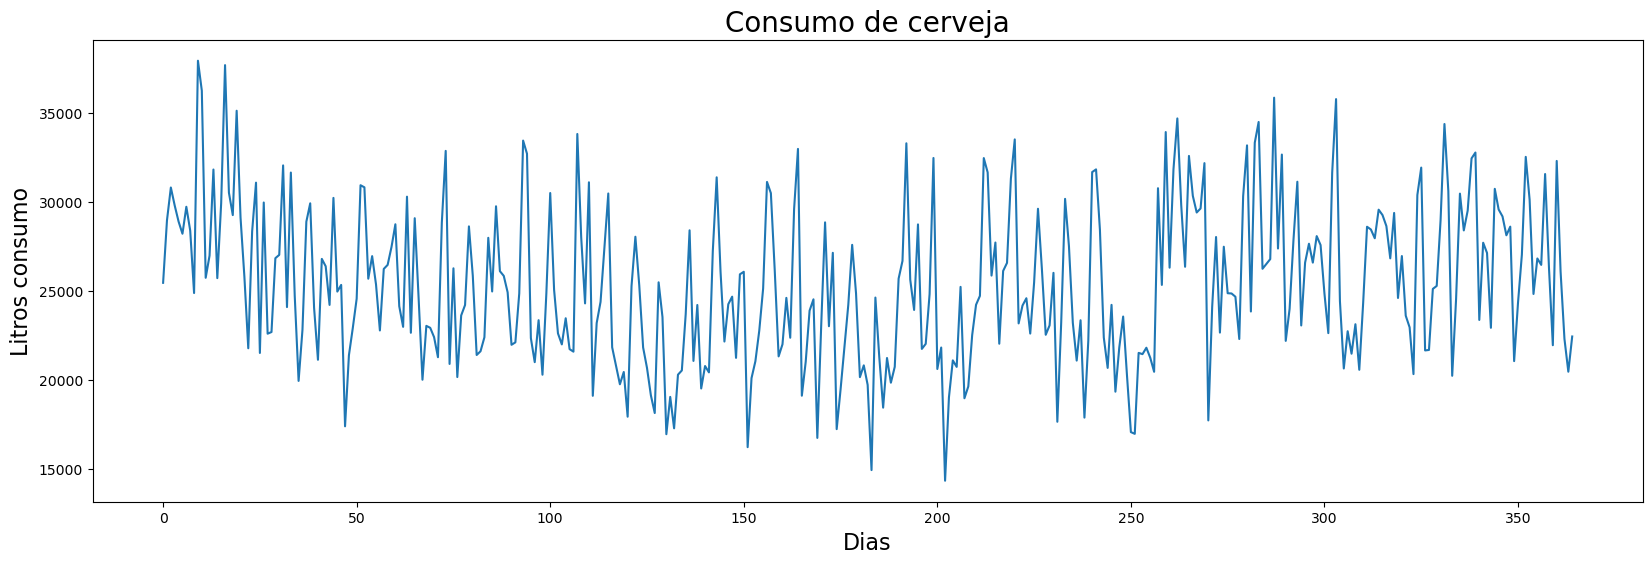

In [ ]:
fig,ax = plt.subplots(figsize=(20,6))
ax.set_title('Consumo de cerveja', fontsize=20)
ax.set_ylabel('Litros consumo', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = dados1['consumo'].plot()

Box-plot da variável dependete(y)

Text(0, 0.5, 'Litros')

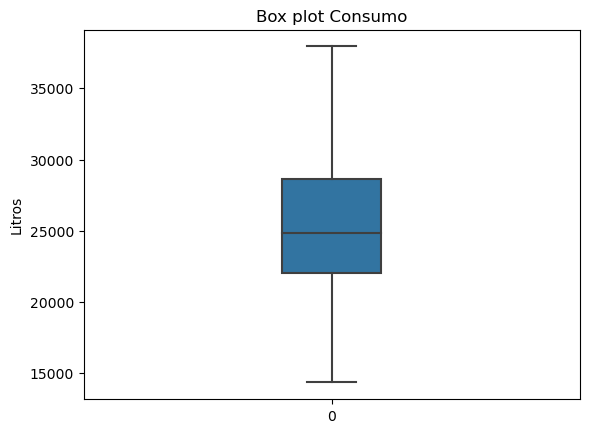

In [ ]:
ax = sns.boxplot(data=dados1['consumo'], orient='v', width=0.2)
ax.set_title('Box plot Consumo')
ax.set_ylabel('Litros')

Box plot com duas variaveis

Text(0.5, 0, 'Final de Semana')

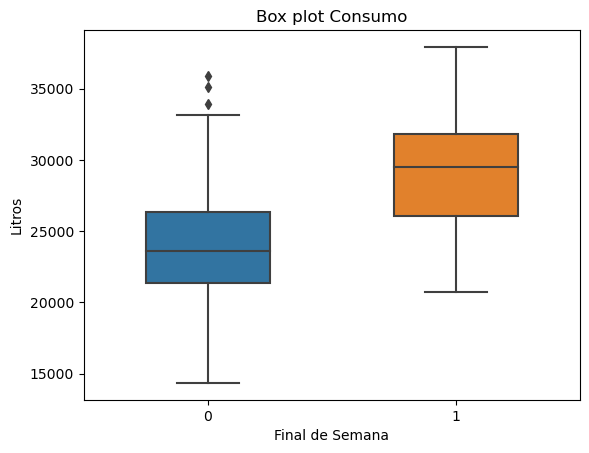

In [ ]:
ax = sns.boxplot(y= 'consumo', x='fds', data=dados1, orient='v', width=0.5)
ax.set_title('Box plot Consumo')
ax.set_ylabel('Litros')
ax.set_xlabel('Final de Semana')

Distribuição de frequências da variável dependete(y)

c:\Users\Michael\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


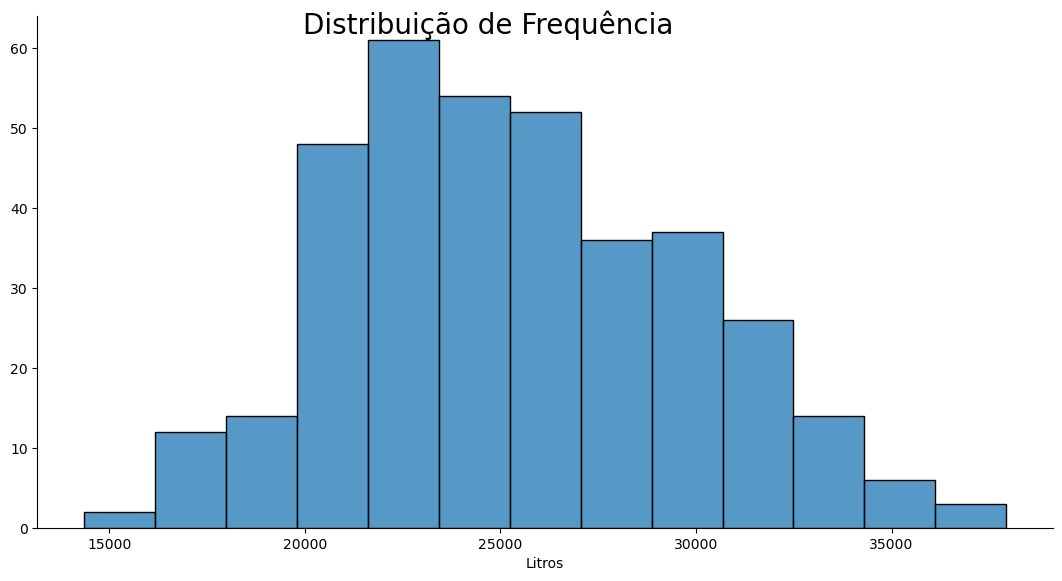

In [ ]:
ax = sns.displot(dados['consumo'])
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Distribuição de Frequência', fontsize=20)
ax.set_axis_labels('Litros', '')
plt.show()

Variável Dependete X Variáveis Explicativas(Pairplot)

c:\Users\Michael\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


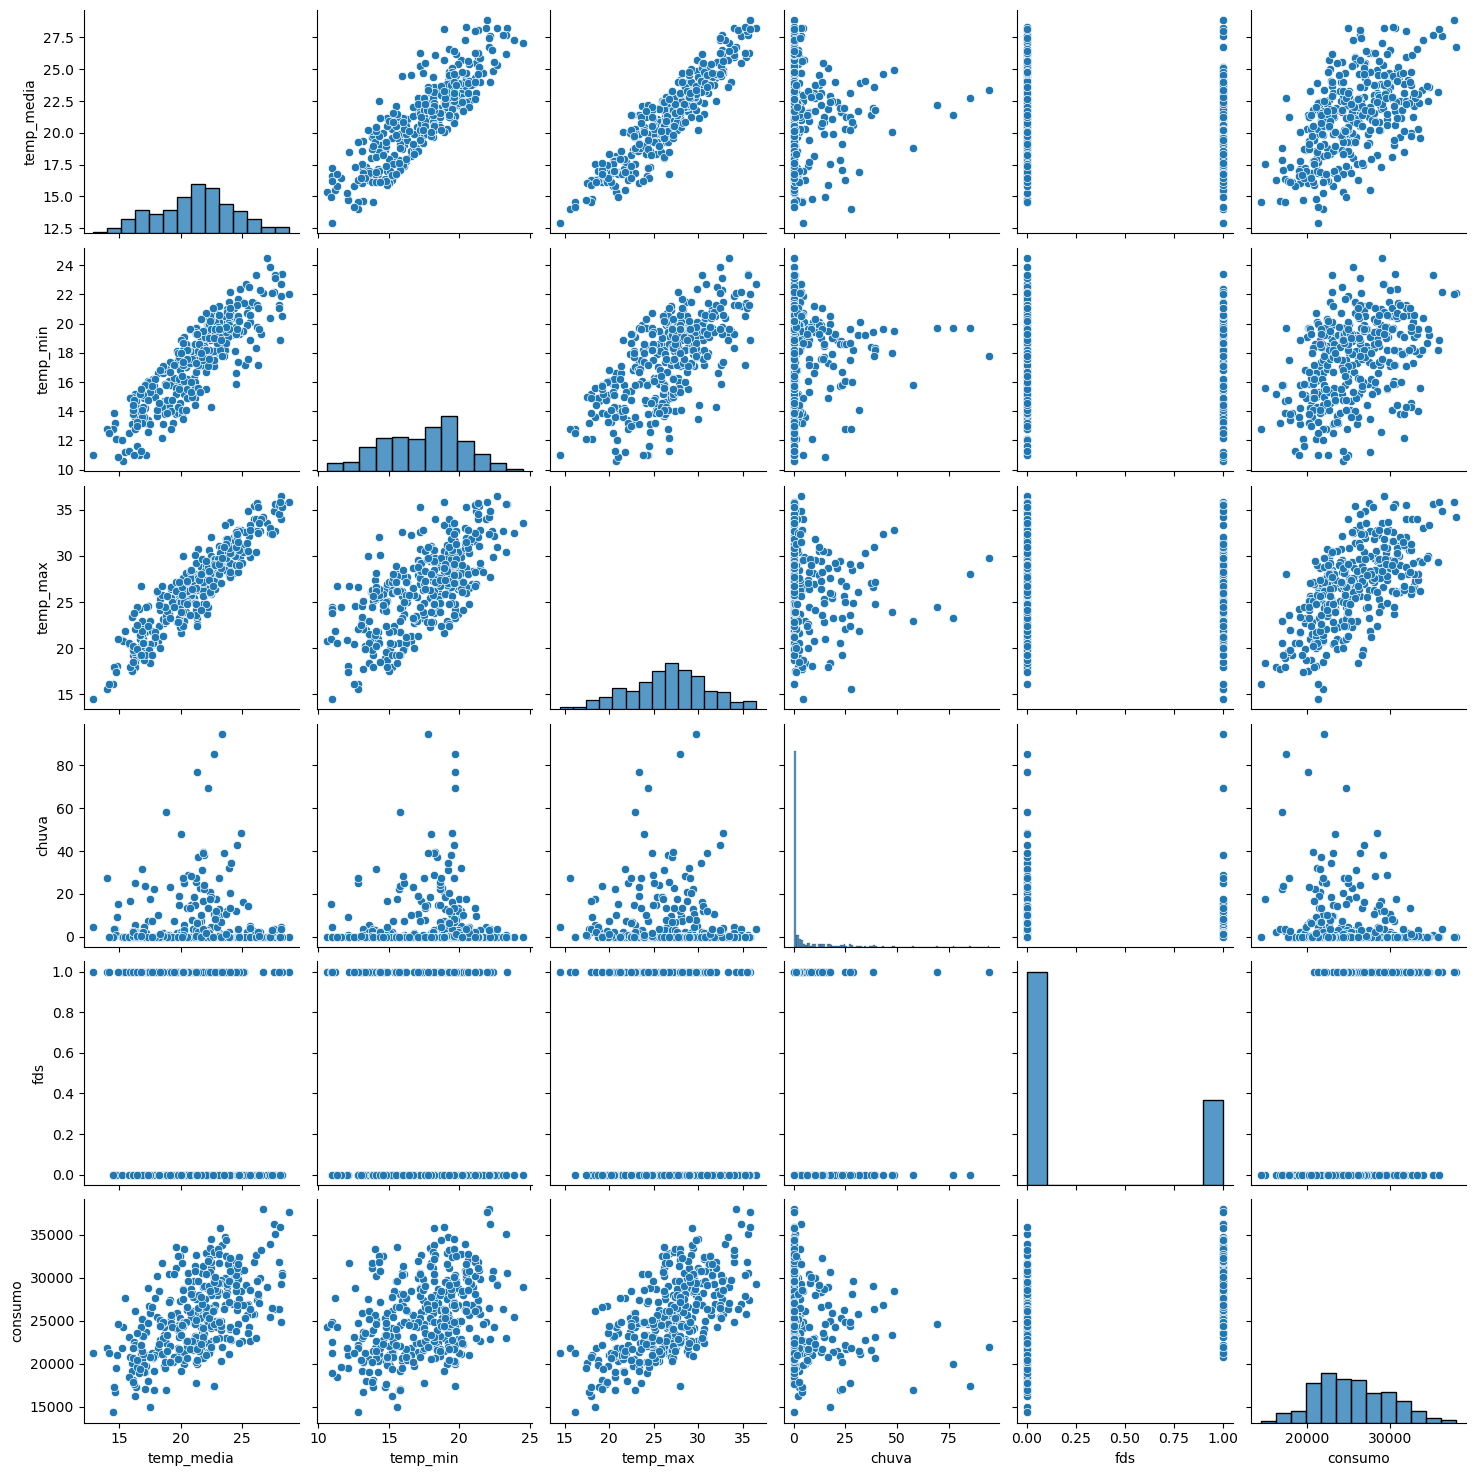

In [ ]:
ax = sns.pairplot(dados1)

c:\Users\Michael\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.05, 'Dispersão entre as varíaveis')

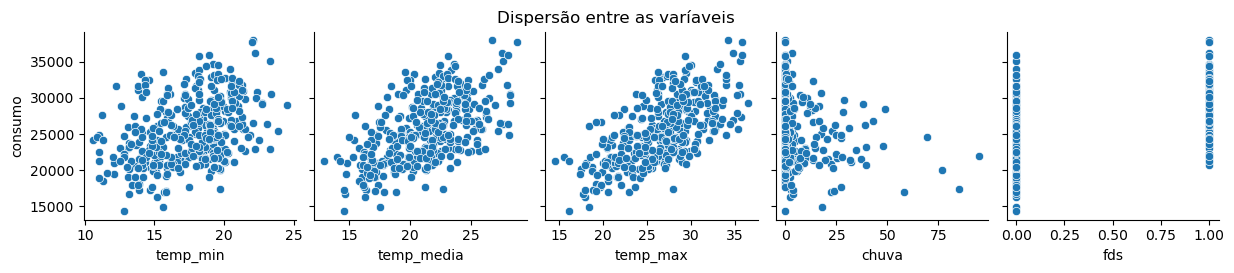

In [ ]:
ax = sns.pairplot(dados1, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'])
ax.fig.suptitle	('Dispersão entre as varíaveis', y = 1.05)

c:\Users\Michael\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.05, 'Dispersão entre as varíaveis')

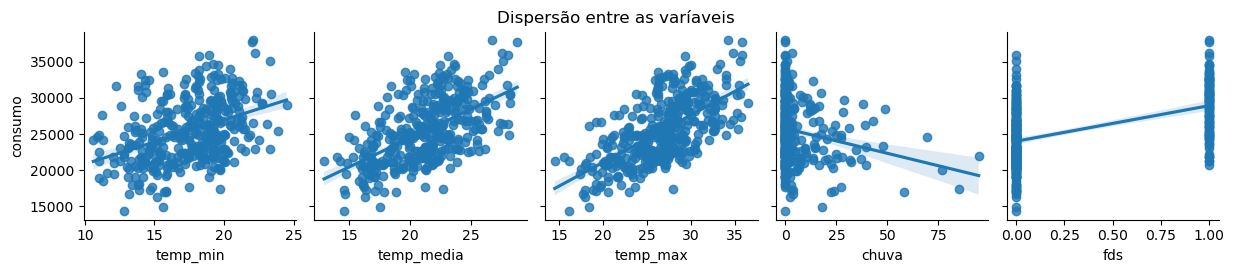

In [ ]:
ax = sns.pairplot(dados1, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind = 'reg')
ax.fig.suptitle	('Dispersão entre as varíaveis', y = 1.05)

Plotando com um terceira variável

c:\Users\Michael\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


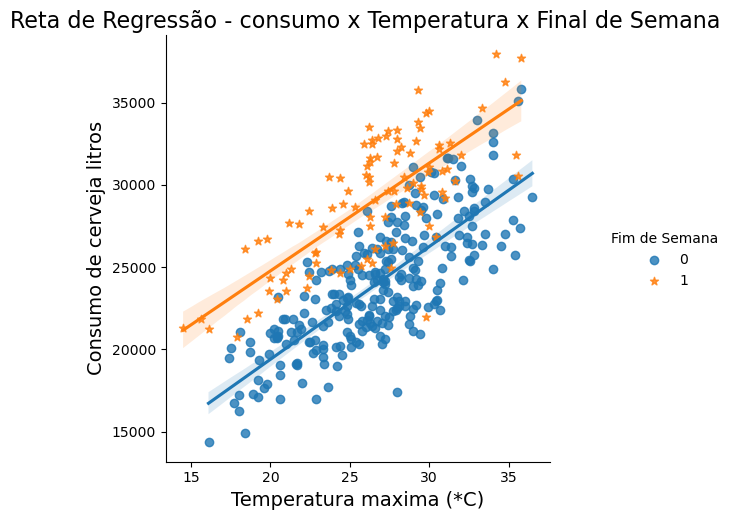

In [ ]:
ax = sns.lmplot(x = "temp_max", y="consumo", data=dados, hue="fds", markers=['o', '*'], legend=False)
ax.fig.suptitle('Reta de Regressão - consumo x Temperatura x Final de Semana', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura maxima (*C)", fontsize=14)
ax.set_ylabels("Consumo de cerveja litros", fontsize=14)
ax.add_legend(title="Fim de Semana")

Estimando o modelo de regressão linear para consumo

In [ ]:
y = dados1['consumo'] # Variavel dependente
X = dados1[['temp_max', 'chuva', 'fds']] # Variavel independente

Dividindo em treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

Verificando o tamanho da divisão do dataset entre treino e teste

In [ ]:
X_train.shape

(255, 3)

Instanciando a classe LinearRegression()

In [ ]:
modelo = LinearRegression()

Estimando o modelo

In [ ]:
modelo.fit(X_train,y_train)

LinearRegression()

Corficiente de Determinação - R²

In [ ]:
print('R² = {}'.format(modelo.score(X_train,y_train).round(2))) # modelo de treino

R² = 0.73


Gerando previsões para dados de TESTE

In [ ]:
y_previsto = modelo.predict(X_test)


In [ ]:
metricas = metrics.r2_score(y_test, y_previsto).round(2)
print('R² = ', metricas)

R² =  0.69


Dados de entrada

In [ ]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


Gerando previsão pontual

In [ ]:
modelo.predict(entrada).round(2)[0]

26094.9

Criando um simulador simples

In [ ]:
temp_max = 37.5
chuva = 0
fds=1
entrada = [[temp_max,chuva,fds]]
print('Quantidade de litros a serem consumidos {:.2f}'.format(modelo.predict(entrada).round(2)[0]))


Quantidade de litros a serem consumidos 37030.69


c:\Users\Michael\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Obtendo o intercepto do modelo

  *O intercepto representa o efeito médio em Y(Consumo de cerveja)  quando as variaveis explicativas valem 0.*

In [ ]:
modelo.intercept_

5951.976339312445

In [ ]:
type(modelo.intercept_)

numpy.float64

Coeficiente de regressão

*Varinado 1 grau quanto isso altera no resulta, assumindo que as outras variaveis continuem constante*

In [ ]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

*O Comando a cima demonstra, no primeiro item do array que: para cada grau que varia tem uma acrecimo de 684.73 no consumo de cerveja, na segunda posição para cada 1mm de chuva e decrecido de 60.78 no consumo, e por ultimo se for fim de semana há um acressimo de 5401.08 no acressimo do consumo.*

Análise Gráficas das Previsões

In [ ]:
y_previsto_train = modelo.predict(X_train)

<Axes: title={'center': 'Previsão X Real'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Consumo de Cerveja (litros) - Real'>

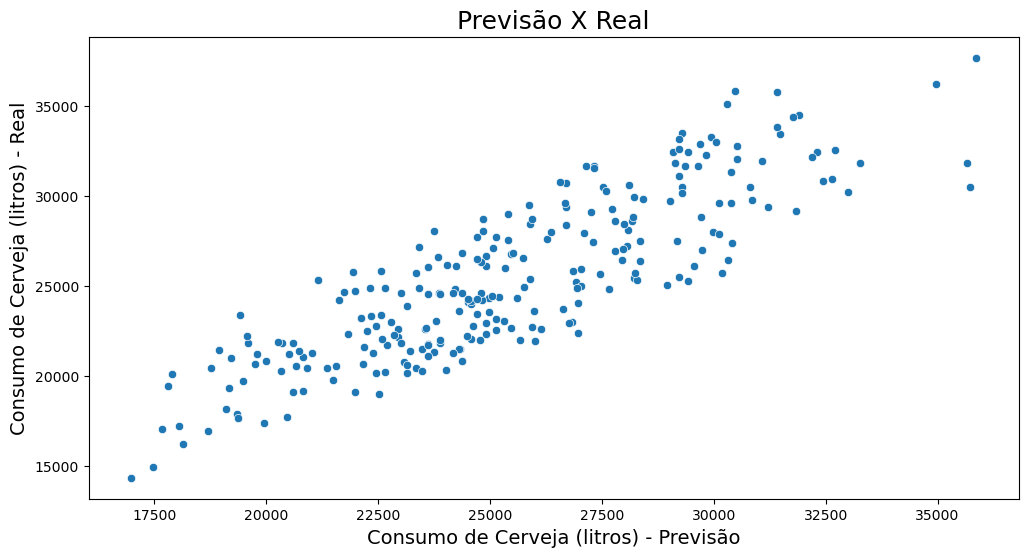

In [ ]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)
ax